In [1]:
import keras

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('XLA_GPU')))


Num GPUs Available:  1


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6048117534380410918
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17596412970260207834
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6531337689
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1450225066582376912
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2148655253293133069
physical_device_desc: "device: XLA_GPU device"
]


In [5]:
from tensorflow.python.client import device_lib
import tensorflow as tf

print(device_lib.list_local_devices())
print(tf.test.is_built_with_cuda())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 922849939063201809
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9496296594293445527
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6531337689
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4371788383774871719
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11694124333938719416
physical_device_desc: "device: XLA_GPU device"
]
True


In [6]:
sess =  tf.compat.v1.Session(config= tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [7]:
tf.config.experimental.list_physical_devices('XLA_GPU')

[PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [8]:
tf.config.list_physical_devices('XLA_GPU')

[PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [9]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf 

In [10]:
import pathlib

### Load images

In [11]:
data_dir = pathlib.Path('archive/brain_tumor_dataset')

In [12]:
data_dir 

WindowsPath('archive/brain_tumor_dataset')

In [13]:
for name in data_dir.glob('*\*.*'):
    print(name)

archive\brain_tumor_dataset\no\1 no.jpeg
archive\brain_tumor_dataset\no\10 no.jpg
archive\brain_tumor_dataset\no\11 no.jpg
archive\brain_tumor_dataset\no\12 no.jpg
archive\brain_tumor_dataset\no\13 no.jpg
archive\brain_tumor_dataset\no\14 no.jpg
archive\brain_tumor_dataset\no\15 no.jpg
archive\brain_tumor_dataset\no\17 no.jpg
archive\brain_tumor_dataset\no\18 no.jpg
archive\brain_tumor_dataset\no\19 no.jpg
archive\brain_tumor_dataset\no\2 no.jpeg
archive\brain_tumor_dataset\no\20 no.jpg
archive\brain_tumor_dataset\no\21 no.jpg
archive\brain_tumor_dataset\no\22 no.jpg
archive\brain_tumor_dataset\no\23 no.jpg
archive\brain_tumor_dataset\no\24 no.jpg
archive\brain_tumor_dataset\no\25 no.jpg
archive\brain_tumor_dataset\no\26 no.jpg
archive\brain_tumor_dataset\no\27 no.jpg
archive\brain_tumor_dataset\no\28 no.jpg
archive\brain_tumor_dataset\no\29 no.jpg
archive\brain_tumor_dataset\no\3 no.jpg
archive\brain_tumor_dataset\no\30 no.jpg
archive\brain_tumor_dataset\no\31 no.jpg
archive\brain_tum

In [14]:
image_count = len(list(data_dir.glob('*\*.*')))
print(image_count)

253


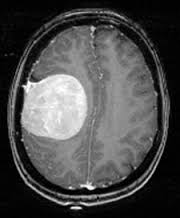

In [15]:
image_yes = list(data_dir.glob('yes/*'))
PIL.Image.open(str(image_yes[0]))

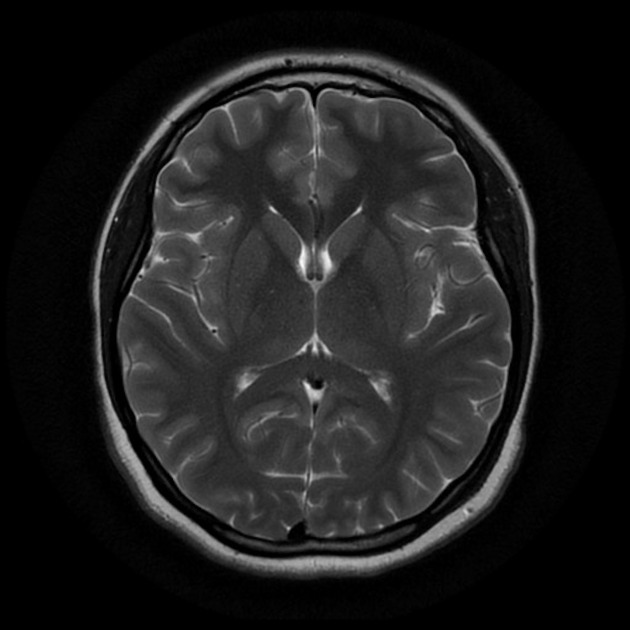

In [16]:
image_no = list(data_dir.glob('no/*'))
PIL.Image.open(str(image_no[0]))

### Build dataset

In [27]:
batch_size = 32
img_height, img_width = 128, 128

In [28]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [29]:
train_ds

<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [31]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


## Visualize  data

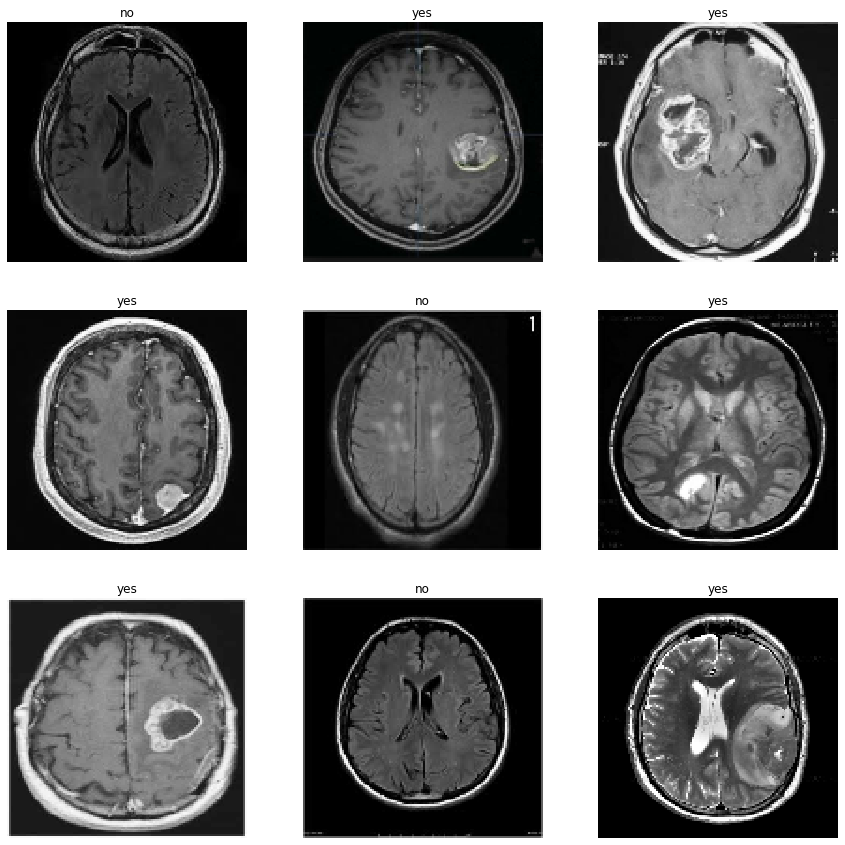

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [34]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.121596396 1.0


## Training model

In [115]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = tf.nn.dropout(x, rate=0.1)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)



#block = ResnetIdentityBlock( [10, 10], (1, 1))

In [116]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  ResnetIdentityBlock([1, 10,  1], 3),
  #layers.SpatialDropout2D(0.5),
  ResnetIdentityBlock([1, 10,  1], 3), 
  ResnetIdentityBlock([1, 10,  1], 3),
  ResnetIdentityBlock([1, 10,  1], 3), 
  ResnetIdentityBlock([1, 10,  1], 3),
  ResnetIdentityBlock([1, 10,  1], 3), 
  #layers.Conv2D(32, 3, activation='relu'),
  #layers.MaxPooling2D(), 
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [117]:
    model.compile(
      optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [118]:
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [119]:
    model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=200,
      callbacks=[callback],
    )

Epoch 1/200
7/7 [==============================] - 1s 153ms/step - loss: 46.3279 - accuracy: 0.4680 - val_loss: 0.6246 - val_accuracy: 0.6400
Epoch 2/200
7/7 [==============================] - 0s 61ms/step - loss: 12.8368 - accuracy: 0.6059 - val_loss: 0.6338 - val_accuracy: 0.6400
Epoch 3/200
7/7 [==============================] - 0s 59ms/step - loss: 7.3584 - accuracy: 0.4138 - val_loss: 0.7130 - val_accuracy: 0.4000
Epoch 4/200
7/7 [==============================] - 0s 60ms/step - loss: 5.0343 - accuracy: 0.5813 - val_loss: 0.6294 - val_accuracy: 0.6400
Epoch 5/200
7/7 [==============================] - 0s 59ms/step - loss: 3.2256 - accuracy: 0.4532 - val_loss: 0.7300 - val_accuracy: 0.4200
Epoch 6/200
7/7 [==============================] - 0s 61ms/step - loss: 2.0041 - accuracy: 0.6404 - val_loss: 0.7163 - val_accuracy: 0.3800
Epoch 7/200
7/7 [==============================] - 0s 61ms/step - loss: 1.1541 - accuracy: 0.4926 - val_loss: 0.6425 - val_accuracy: 0.6400
Epoch 8/200
7/7 [

7/7 [==============================] - 0s 62ms/step - loss: 0.1726 - accuracy: 0.9409 - val_loss: 0.5306 - val_accuracy: 0.8000
Epoch 60/200
7/7 [==============================] - 0s 61ms/step - loss: 0.1587 - accuracy: 0.9557 - val_loss: 0.5079 - val_accuracy: 0.8000
Epoch 61/200
7/7 [==============================] - 0s 61ms/step - loss: 0.1205 - accuracy: 0.9704 - val_loss: 0.7469 - val_accuracy: 0.6800
Epoch 62/200
7/7 [==============================] - 0s 60ms/step - loss: 0.1630 - accuracy: 0.9458 - val_loss: 0.5155 - val_accuracy: 0.8400
Epoch 63/200
7/7 [==============================] - 0s 60ms/step - loss: 0.1145 - accuracy: 0.9803 - val_loss: 0.5662 - val_accuracy: 0.7000
Epoch 64/200
7/7 [==============================] - 0s 61ms/step - loss: 0.1341 - accuracy: 0.9507 - val_loss: 0.5761 - val_accuracy: 0.8000
Epoch 65/200
7/7 [==============================] - 0s 60ms/step - loss: 0.1090 - accuracy: 0.9754 - val_loss: 0.6165 - val_accuracy: 0.7000
Epoch 66/200
7/7 [========

7/7 [==============================] - 0s 59ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.4652 - val_accuracy: 0.8400
Epoch 118/200
7/7 [==============================] - 0s 59ms/step - loss: 0.0262 - accuracy: 0.9901 - val_loss: 0.6196 - val_accuracy: 0.8400
Epoch 119/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.6734 - val_accuracy: 0.8000
Epoch 120/200
7/7 [==============================] - 0s 61ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.7852 - val_accuracy: 0.7400
Epoch 121/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.6198 - val_accuracy: 0.8800
Epoch 122/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.6478 - val_accuracy: 0.7400
Epoch 123/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.7014 - val_accuracy: 0.7600
Epoch 124/200
7/7 [=

Epoch 175/200
7/7 [==============================] - 0s 59ms/step - loss: 0.0693 - accuracy: 0.9754 - val_loss: 0.9649 - val_accuracy: 0.7400
Epoch 176/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0229 - accuracy: 0.9951 - val_loss: 0.8261 - val_accuracy: 0.8000
Epoch 177/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 1.3654 - val_accuracy: 0.6600
Epoch 178/200
7/7 [==============================] - 0s 59ms/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.7221 - val_accuracy: 0.8400
Epoch 179/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.7174 - val_accuracy: 0.8200
Epoch 180/200
7/7 [==============================] - 0s 60ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.8270 - val_accuracy: 0.8000
Epoch 181/200
7/7 [==============================] - 0s 59ms/step - loss: 0.0061 - accuracy: 0.9951 - val_loss: 0.6661 - val_accuracy: 0.8600
Epoch 

In [91]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

<ipython-input-55-f8618f4dcb6d>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(10, 5, idx + i + 1)


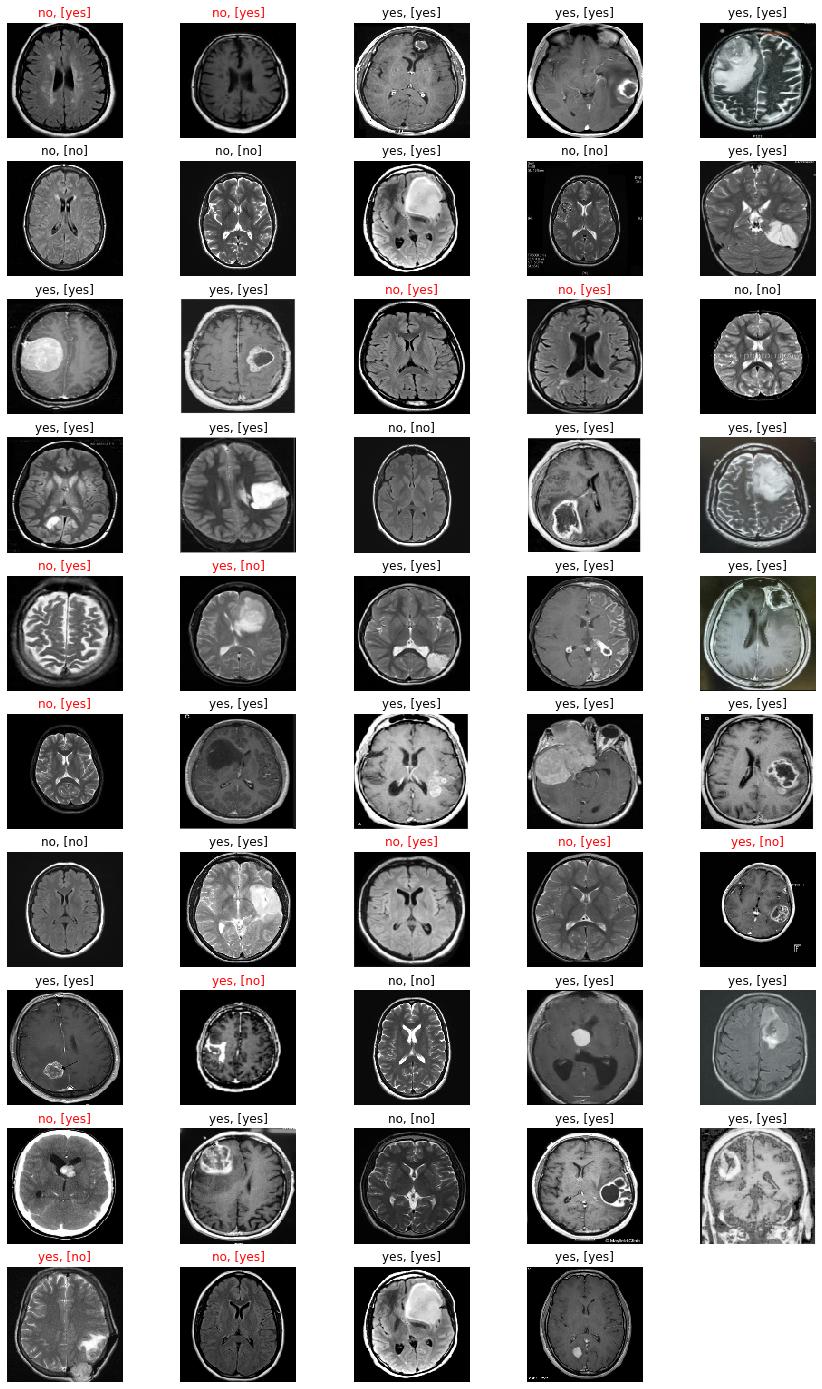

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 25))
idx=0
for images, labels in val_ds:
    preds = model.predict(images)
    pred_category = tf.argmax(preds, 1).numpy()
    for i in range(len(images)):
        #print(i)
        ax = plt.subplot(10, 5, idx + i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        correct = class_names[labels[i]] ==  class_names[pred_category[i]]
        if not correct:
            plt.title(class_names[labels[i]] + ", [" + class_names[pred_category[i]] + "]", color='r')
        else:
            plt.title(class_names[labels[i]] + ", [" + class_names[pred_category[i]] + "]")
        plt.axis("off")
    idx += i
